<div class="alert alert-danger">

# Applied Time Series: Lab Session 1 - Exercises
    
</div>

<div class="alert alert-warning">
    
Instructor: **Sylvain BENOIT** 
    
</div>

# Table of contents <a id='section_0'></a>
* [Exercise 1: Testing serial dependence](#section_1)
* [Exercise 2: Non-stationary processes](#section_2)
* [Exercise 3: Identifying the correct specification](#section_3)
* [Exercise 4: Information criteria in specification](#section_4)
* [Exercise 5: Evaluate prediction quality](#section_5)

In [1]:
#===============================================================================
# Libraries
#===============================================================================

# data library
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import signal
from itertools import product
import scipy.io as sio

# plotting library
from matplotlib import pyplot as plt

In [2]:
path = 'C:/Users/faune/Downloads/'
starting_date = '10/3/2024'

## Exercise 1: Testing serial dependence <a id='section_1'></a>
*[Back to toc](#section_0)*

Generate $M=1000$ draws of a white noise process of length $T=100$ observations $y_t = \varepsilon_t \sim N(0,1)$ in a $(100\times1000)$ array.

> 1. Plot the correlogram of the first draw of the process using the *sm.graphics.tsa.plot_acf* and *_pacf function*. Do you see any significant correlations beyond the default significance threshold? Is this normal?
> 2. Run a Ljung-Box test on all $N$ draws using the *sm.tsa.stattools.q_stat* function (use 20 autocorrelations to be tested at the 5% significance level). Report the number of rejections of zero autocorrelation.
> 3. Plot a histogram of the Ljung-Box test statistics, with 20 bins.
> 4. Repeat 1. to 3. using an autoregressive model AR(1) $y_t = \alpha~y_{t-1} + \varepsilon_t$, $\varepsilon_t \sim N(0,1)$, with the autoregressive parameter equal to 0.1,0.5,0.8.
> 5. Repeat 1. to 4. for T=1000.

In [3]:
T = 1000
M = 1000

In [4]:
ar1_val = 0.1  # 1.3
ar2_val = 0    # -0.4

ma1_val = 0    # -1.2
ma2_val = 0    # 0.2

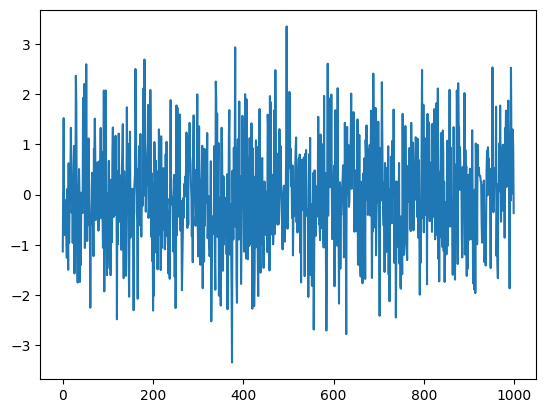

In [5]:
dta = np.zeros((T,M))
np.random.seed(111)
 
arparams = np.array([ar1_val, ar2_val])
#arparams = np.array([ar1_val])*
maparams = np.array([ma1_val, ma2_val])
ar = np.r_[1, -arparams] # add zero-lag and negate*
ma = np.r_[1, maparams] # add zero-lag
    
#dta = sm.tsa.arma_generate_sample(ar, ma, (M, T), axis=1 )
for x in range(0, M):
    dta[:,x] = sm.tsa.arma_generate_sample(ar, ma, T)
    
plt.plot(dta[:,0])

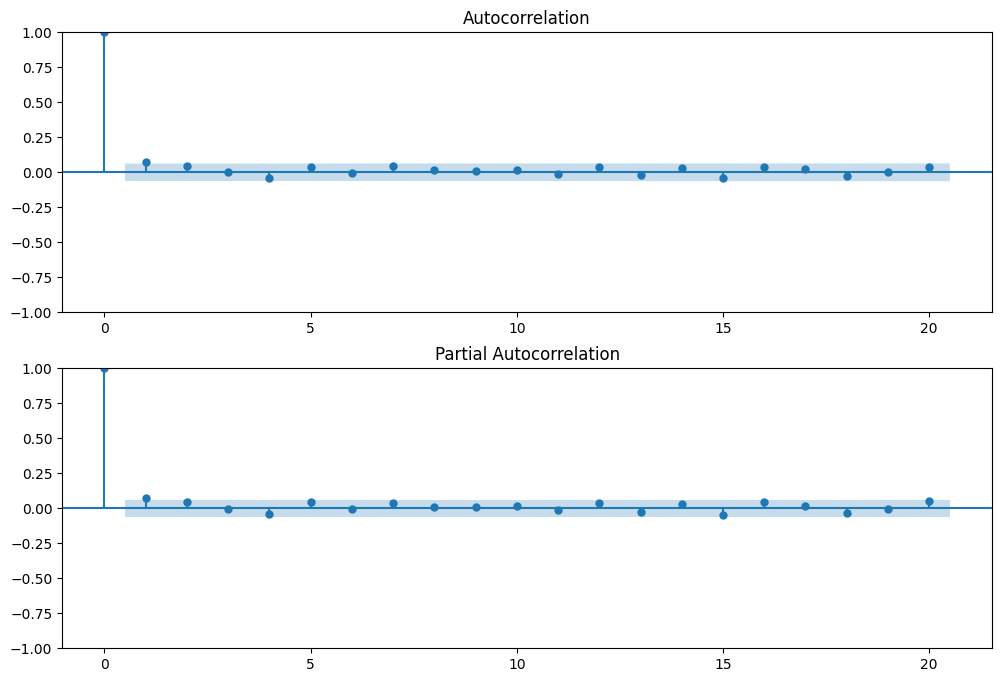

In [6]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,1,1)
fig = sm.graphics.tsa.plot_acf(dta[:,0], lags=20, ax=ax1)
ax2 = fig.add_subplot(2,1,2)
fig = sm.graphics.tsa.plot_pacf(dta[:,0], method='ywm', lags=20, ax=ax2)

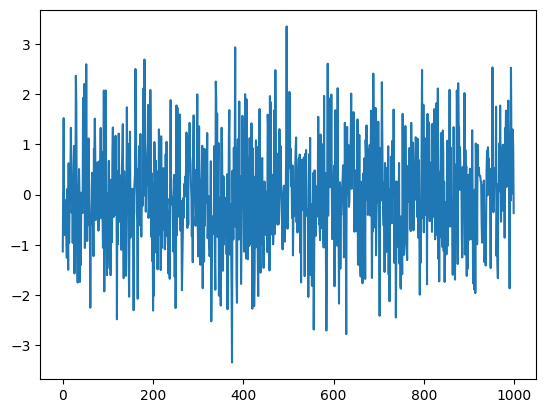

In [7]:
dta = np.zeros((T,M))
np.random.seed(111)
 
arparams = np.array([ar1_val, ar2_val])
#arparams = np.array([ar1_val])*
maparams = np.array([ma1_val, ma2_val])
ar = np.r_[1, -arparams] # add zero-lag and negate*
ma = np.r_[1, maparams] # add zero-lag
    
#dta = sm.tsa.arma_generate_sample(ar, ma, (M, T), axis=1 )
for x in range(0, M):
    dta[:,x] = sm.tsa.arma_generate_sample(ar, ma, T)
    
plt.plot(dta[:,0])

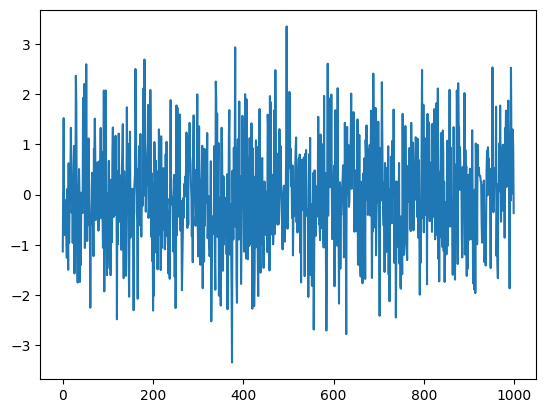

In [8]:
dta = np.zeros((T,M))
np.random.seed(111)
 
arparams = np.array([ar1_val, ar2_val])
#arparams = np.array([ar1_val])*
maparams = np.array([ma1_val, ma2_val])
ar = np.r_[1, -arparams] # add zero-lag and negate*
ma = np.r_[1, maparams] # add zero-lag
    
#dta = sm.tsa.arma_generate_sample(ar, ma, (M, T), axis=1 )
for x in range(0, M):
    dta[:,x] = sm.tsa.arma_generate_sample(ar, ma, T)
    
plt.plot(dta[:,0])

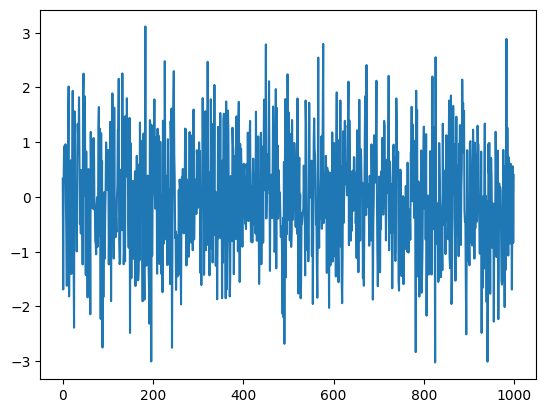

In [9]:
plt.plot(dta[:,50])

In [10]:
ts = pd.Series(dta[:,0], index=pd.date_range(starting_date, periods=T))

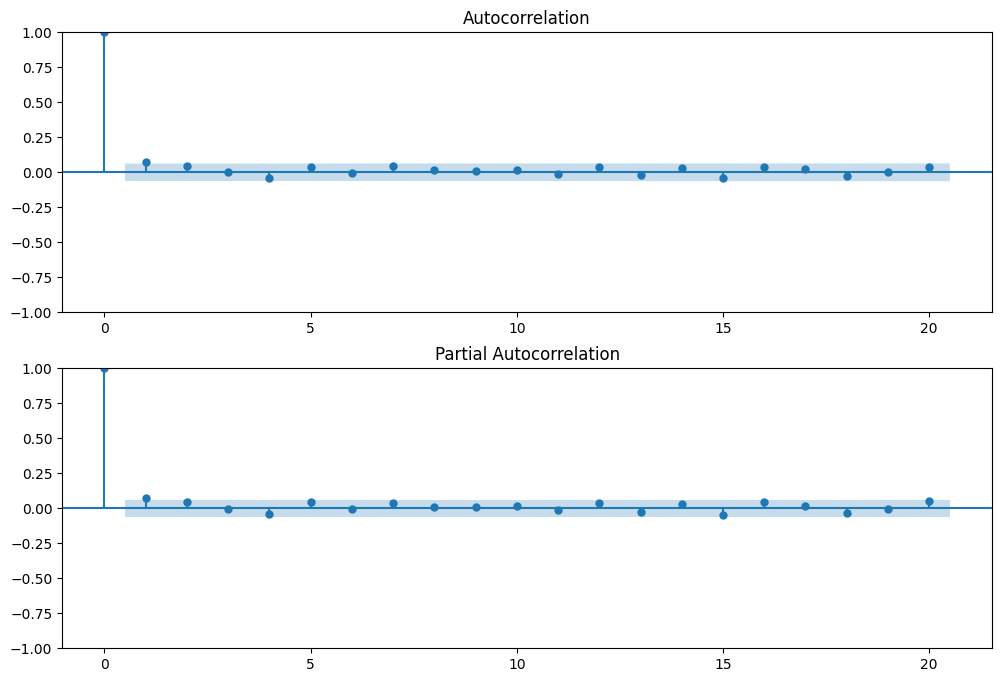

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,1,1)
fig = sm.graphics.tsa.plot_acf(ts, lags=20, ax=ax1)
ax2 = fig.add_subplot(2,1,2)
fig = sm.graphics.tsa.plot_pacf(ts, method='ywm', lags=20, ax=ax2)

## Ljung-Box test

In [12]:
n_autocor = 20
temp = np.zeros(n_autocor)
temp = sm.tsa.stattools.acf(dta[:,0], nlags=n_autocor)[1:temp.shape[0]]
lb, lb_p = sm.tsa.stattools.q_stat(temp,T)
print(lb)
lb[n_autocor-2]

[ 5.93694946  8.15286354  8.16739717  9.57934064 11.12542372 11.14192304
 13.03971194 13.22340199 13.27868502 13.59029935 13.83452179 15.39919569
 15.91695153 16.7060127  18.41043384 19.79846864 20.40326002 21.30958964
 21.31078226]


np.float64(21.310782263903715)

In [13]:
help(sm.tsa.stattools.q_stat)

Help on function q_stat in module statsmodels.tsa.stattools:

q_stat(x, nobs)
    Compute Ljung-Box Q Statistic.
    
    Parameters
    ----------
    x : array_like
        Array of autocorrelation coefficients.  Can be obtained from acf.
    nobs : int, optional
        Number of observations in the entire sample (ie., not just the length
        of the autocorrelation function results.
    
    Returns
    -------
    q-stat : ndarray
        Ljung-Box Q-statistic for autocorrelation parameters.
    p-value : ndarray
        P-value of the Q statistic.
    
    See Also
    --------
    statsmodels.stats.diagnostic.acorr_ljungbox
        Ljung-Box Q-test for autocorrelation in time series based
        on a time series rather than the estimated autocorrelation
        function.
    
    Notes
    -----
    Designed to be used with acf.



In [14]:
n_autocor = 20
acf_coef = np.zeros((n_autocor+1,M))
lb = np.zeros((n_autocor,M))
lb_p = np.zeros((n_autocor,M))
ts = pd.Series(dta[:,0], index=pd.date_range(starting_date, periods=T))
for x in range(0, M): 
    ts = pd.Series(dta[:,x], index=ts.index)
    acf_coef[:,x] = sm.tsa.stattools.acf(ts, nlags=n_autocor)
    temp_acf_coef = acf_coef[1:acf_coef.shape[0], x]
    lb[:,x], lb_p[:,x] = sm.tsa.stattools.q_stat(temp_acf_coef, T)
           
reject_share = np.mean(lb_p[n_autocor-1,:]<0.05)
print(reject_share)

0.36


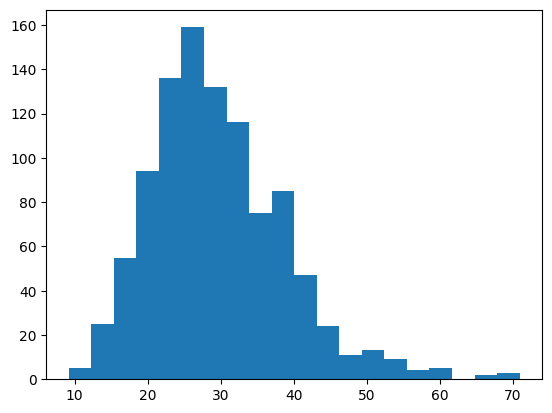

In [15]:
count, bins, ignored = plt.hist(lb[19,:], 20)
plt.show()

In [16]:
from scipy.stats import chi2
df=20
chi2.ppf([0.90, 0.95, 0.99], df)

array([28.41198058, 31.41043284, 37.56623479])

## Exercise 2: Non-stationary processes <a id='section_2'></a>
*[Back to toc](#section_0)*

Generate three non-stationary processes of size $T=500$:

> (i) a simple random walk $y_{1t} = y_{1t-1} + \varepsilon_{1t}$;

> (ii) a random walk with drift $y_{2t} = \mu + y_{2t-1} + \varepsilon_{2t}$; and

> (iii) a linear trend process $y_{3t} = \delta_t + \varepsilon_{3t}$. 
    
Let the first observation for the random walk processes be equal to only the error term. Set the drift and the trend coefficient be equal to $0.5$, and the errors be iid $N(0,1)$.

Plot the three processes in one figure.
> 1. Plot the correlogram of each process. Do you see signs of non-stationarity?
> 2. Generate differenced processes out of the initial ones.
> 3. Check the correlogram of each. Based on this only indicator, did the differencing produce stationarity? Is there any other observation on ACF?
> 4. Detrend the series by regressing them on a constant and a linear trend ($t=1,2,...,T$).
> 5. Repeat question 3 for the detrended series.

In [17]:
np.random.seed(111)
   
T = 1000
mu = .5
delta = .5
ar1_val = 0.7
sigma_ts1 = 1
sigma_ts2 = 1
sigma_ts3 = 1

ts1 = pd.Series(np.random.randn(T) * sigma_ts1, index=pd.date_range(starting_date, periods=T))
ts1 = ts1.cumsum()

ts2 = pd.Series(np.random.randn(T) * sigma_ts2 + mu, index=pd.date_range(starting_date, periods=T))
ts2 = ts2.cumsum()
   
arparams = np.array([ar1_val])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
   
ts3_temp = sm.tsa.arma_generate_sample(ar, ma, T)
ts3 = pd.Series(ts3_temp * sigma_ts3 + delta * np.arange(T), index=pd.date_range(starting_date, periods=T))

In [18]:
ar

array([ 1. , -0.7])

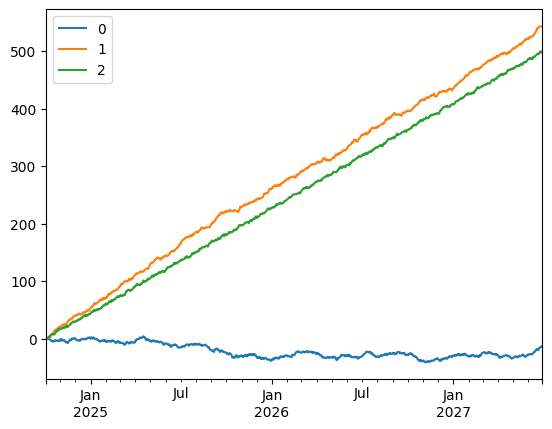

In [19]:
ts_all = pd.concat([ts1, ts2, ts3], axis=1)

ts_all.plot();

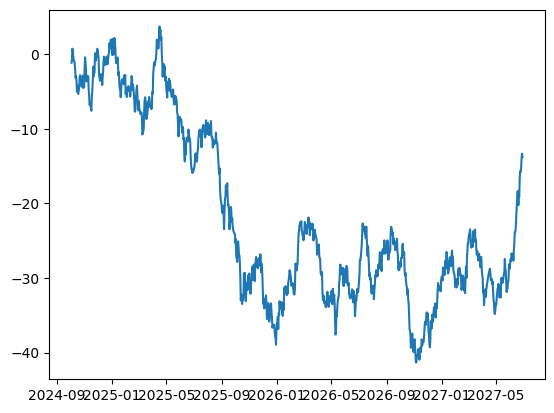

In [20]:
plt.plot(ts1)

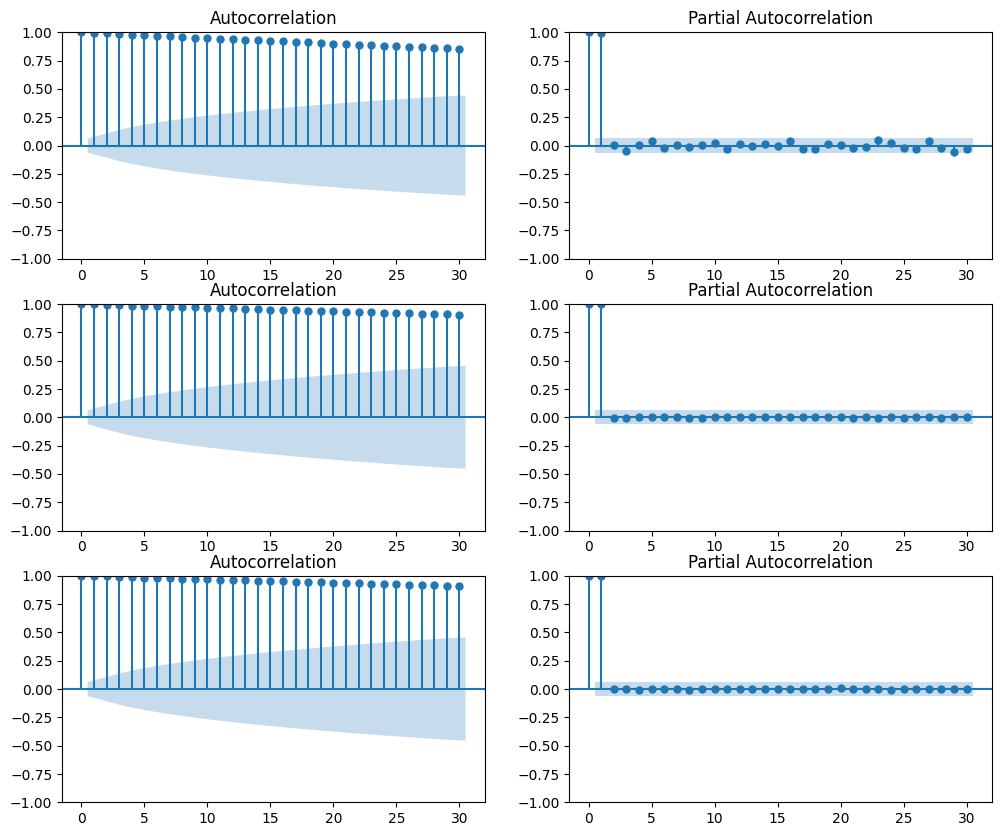

In [21]:
fig = plt.figure(figsize=(12,10))
    
ax1 = fig.add_subplot(3,2,1)
fig = sm.graphics.tsa.plot_acf(ts1, lags=30, ax=ax1)
ax2 = fig.add_subplot(3,2,2)
fig = sm.graphics.tsa.plot_pacf(ts1, lags=30, ax=ax2, method='ywm')
        
ax1 = fig.add_subplot(3,2,3)
fig = sm.graphics.tsa.plot_acf(ts2, lags=30, ax=ax1)
ax2 = fig.add_subplot(3,2,4)
fig = sm.graphics.tsa.plot_pacf(ts2, lags=30, ax=ax2, method='ywm')

ax1 = fig.add_subplot(3,2,5)
fig = sm.graphics.tsa.plot_acf(ts3, lags=30, ax=ax1)
ax2 = fig.add_subplot(3,2,6)
fig = sm.graphics.tsa.plot_pacf(ts3, lags=30, ax=ax2, method='ywm')

In [22]:
help(sm.tsa.stattools.adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag: 'int | None' = None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : {None, int}
        Maximum lag which is included in test, default value of
        12*(nobs/100)^{1/4} is used when ``None``.
    regression : {"c","ct","ctt","n"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "n" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag length among the
      

In [23]:
sm.tsa.stattools.adfuller(np.ravel(ts1), regression='n', autolag='BIC', store=False, regresults=True)

(np.float64(-0.5204259145940303),
 np.float64(0.48770975047827364),
 {'1%': np.float64(-2.5679816723029334),
  '5%': np.float64(-1.9412722092921209),
  '10%': np.float64(-1.6165568281300424)},
 <statsmodels.stats.diagnostic.ResultsStore at 0x259c23f7790>)

In [24]:
sm.tsa.stattools.adfuller(np.ravel(ts2), regression='c', autolag='BIC', store=False, regresults=True)

(np.float64(-0.91945422543702),
 np.float64(0.7814983731963208),
 {'1%': np.float64(-3.4369127451400474),
  '5%': np.float64(-2.864437475834273),
  '10%': np.float64(-2.568312754566378)},
 <statsmodels.stats.diagnostic.ResultsStore at 0x259c238dd50>)

In [25]:
sm.tsa.stattools.adfuller(np.ravel(ts3), regression='ct', autolag='BIC', store=False, regresults=True)

(np.float64(-13.491526920422704),
 np.float64(3.5390035400404676e-21),
 {'1%': np.float64(-3.967860781661831),
  '5%': np.float64(-3.4148938944043334),
  '10%': np.float64(-3.1296421434972537)},
 <statsmodels.stats.diagnostic.ResultsStore at 0x259c26f42d0>)

In [26]:
sm.tsa.stattools.adfuller(np.ravel(ts3), regression='ctt', autolag='BIC', store=False, regresults=True)

(np.float64(-13.510660695808864),
 np.float64(4.57907708296395e-22),
 {'1%': np.float64(-4.382766025596549),
  '5%': np.float64(-3.8383142452686947),
  '10%': np.float64(-3.5569286306152224)},
 <statsmodels.stats.diagnostic.ResultsStore at 0x259c2055110>)

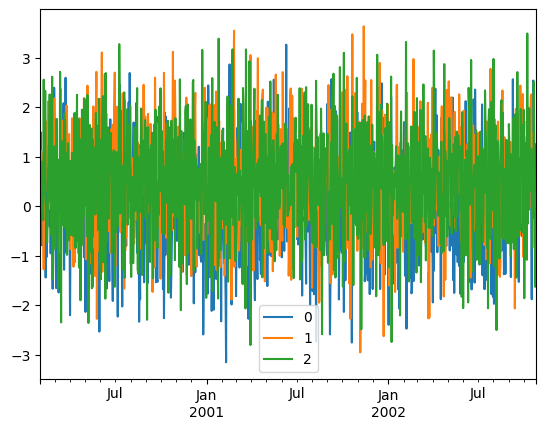

In [27]:
ts1_d = pd.Series(np.diff(ts1), index=pd.date_range('2/1/2000', periods=T-1))  
ts2_d = pd.Series(np.diff(ts2), index=pd.date_range('2/1/2000', periods=T-1))  
ts3_d = pd.Series(np.diff(ts3), index=pd.date_range('2/1/2000', periods=T-1))   
    
ts_all = pd.concat([ts1_d, ts2_d, ts3_d], axis=1)
ts_all.plot();  

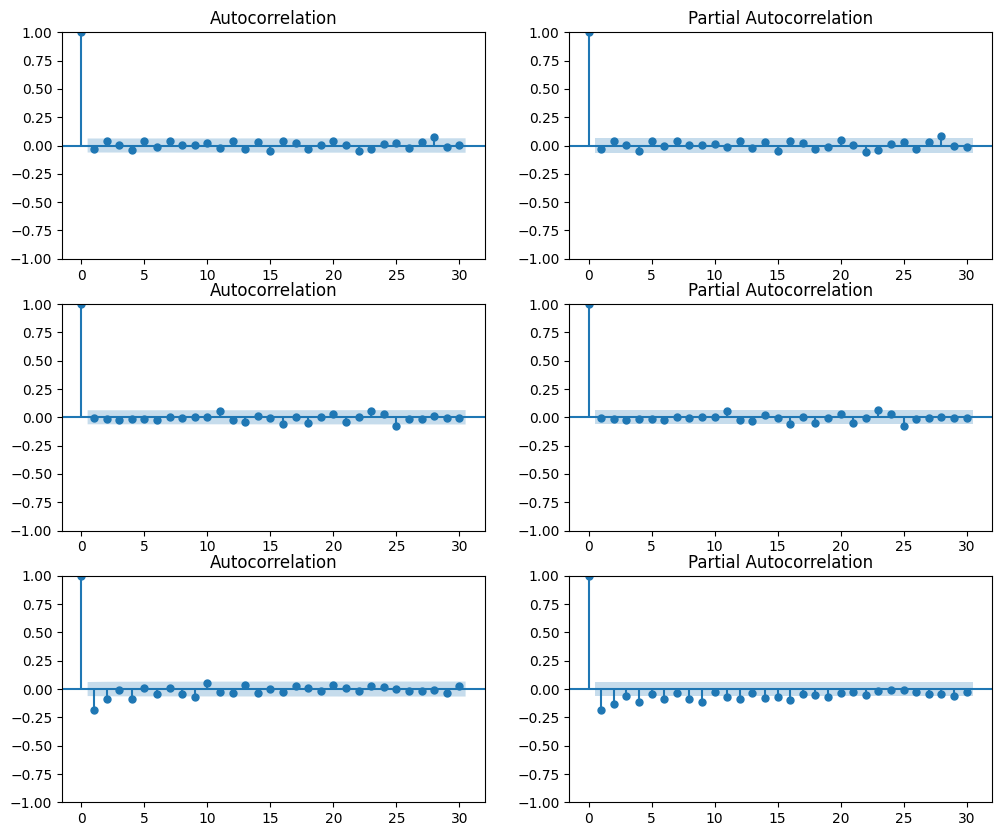

In [28]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(321)
fig = sm.graphics.tsa.plot_acf(ts1_d, lags=30, ax=ax1)
ax2 = fig.add_subplot(322)
fig = sm.graphics.tsa.plot_pacf(ts1_d, lags=30, ax=ax2, method='ywm')
        
ax1 = fig.add_subplot(323)
fig = sm.graphics.tsa.plot_acf(ts2_d, lags=30, ax=ax1)
ax2 = fig.add_subplot(324)
fig = sm.graphics.tsa.plot_pacf(ts2_d, lags=30, ax=ax2, method='ywm')

ax1 = fig.add_subplot(325)
fig = sm.graphics.tsa.plot_acf(ts3_d, lags=30, ax=ax1)
ax2 = fig.add_subplot(326)
fig = sm.graphics.tsa.plot_pacf(ts3_d, lags=30, ax=ax2, method='ywm')

In [29]:
sm.tsa.stattools.adfuller(np.ravel(ts1_d), regression='c', autolag='BIC', store=False, regresults=True)

(np.float64(-32.41365701137422),
 0.0,
 {'1%': np.float64(-3.4369193380671),
  '5%': np.float64(-2.864440383452517),
  '10%': np.float64(-2.56831430323573)},
 <statsmodels.stats.diagnostic.ResultsStore at 0x259c4c78290>)

In [30]:
sm.tsa.stattools.adfuller(np.ravel(ts2_d), regression='n', autolag='BIC', store=False, regresults=True)

(np.float64(-4.182995418886597),
 np.float64(3.5231855075146263e-05),
 {'1%': np.float64(-2.5680066711059024),
  '5%': np.float64(-1.941275277210917),
  '10%': np.float64(-1.6165539281170966)},
 <statsmodels.stats.diagnostic.ResultsStore at 0x259c4d4fa10>)

In [31]:
sm.tsa.stattools.adfuller(np.ravel(ts2_d), regression='c', autolag='BIC', store=False, regresults=True)

(np.float64(-31.63988700446614),
 0.0,
 {'1%': np.float64(-3.4369193380671),
  '5%': np.float64(-2.864440383452517),
  '10%': np.float64(-2.56831430323573)},
 <statsmodels.stats.diagnostic.ResultsStore at 0x259c27713d0>)

In [32]:
sm.tsa.stattools.adfuller(np.ravel(ts3_d), regression='c', autolag='BIC', store=False, regresults=True)

(np.float64(-20.250781620450958),
 0.0,
 {'1%': np.float64(-3.4369391965679257),
  '5%': np.float64(-2.86444914142694),
  '10%': np.float64(-2.5683189679553546)},
 <statsmodels.stats.diagnostic.ResultsStore at 0x259c4cff350>)

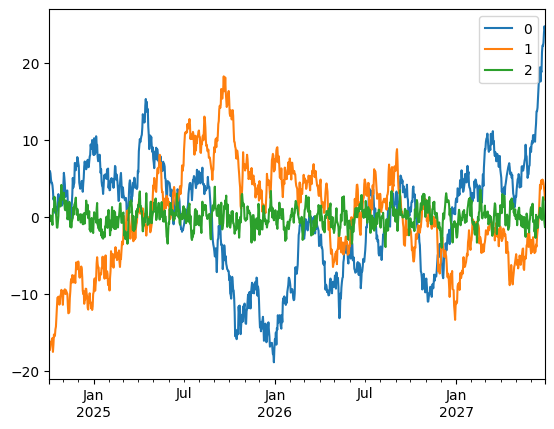

In [33]:
#it is WRONG to detrend ts1 and ts2!!!!
ts1_det = pd.Series(signal.detrend(ts1, axis=-1, type='linear'), index=pd.date_range(starting_date, periods=T))
ts2_det = pd.Series(signal.detrend(ts2, axis=-1, type='linear'), index=pd.date_range(starting_date, periods=T))
ts3_det = pd.Series(signal.detrend(ts3, axis=-1, type='linear'), index=pd.date_range(starting_date, periods=T))
 
ts_all = pd.concat([ts1_det, ts2_det, ts3_det], axis=1)
ts_all.plot();       

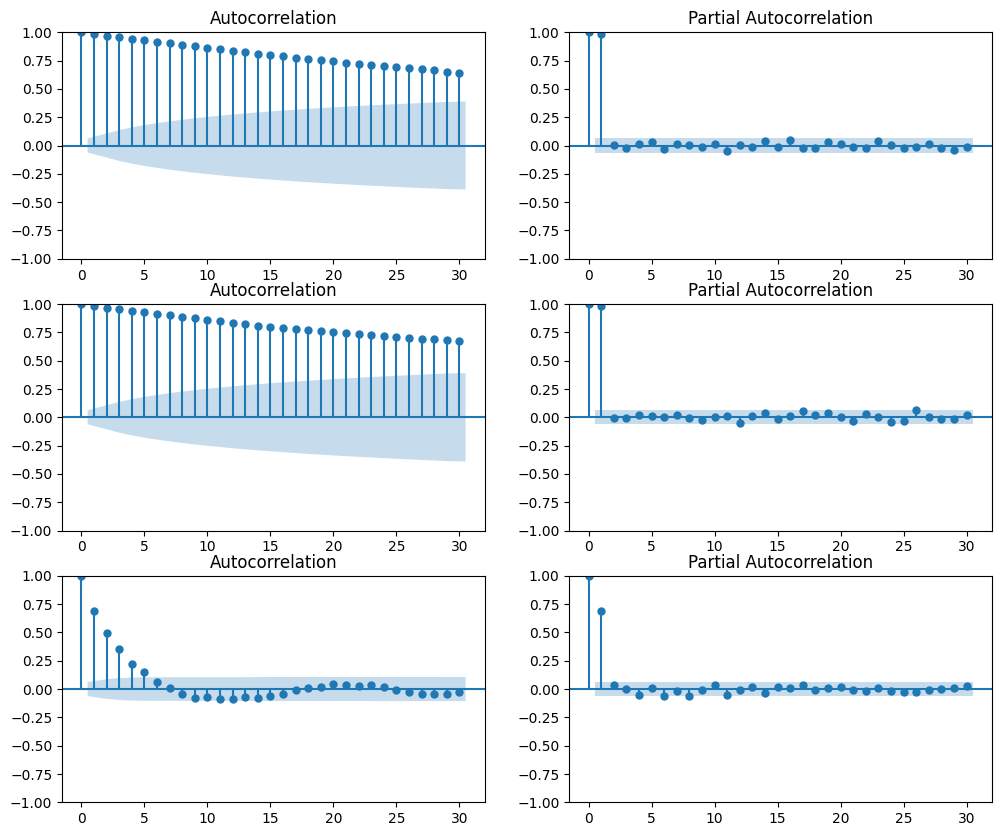

In [34]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(321)
fig = sm.graphics.tsa.plot_acf(ts1_det, lags=30, ax=ax1)
ax2 = fig.add_subplot(322)
fig = sm.graphics.tsa.plot_pacf(ts1_det, lags=30, ax=ax2, method='ywm')
        
ax1 = fig.add_subplot(323)
fig = sm.graphics.tsa.plot_acf(ts2_det, lags=30, ax=ax1)
ax2 = fig.add_subplot(324)
fig = sm.graphics.tsa.plot_pacf(ts2_det, lags=30, ax=ax2, method='ywm')

ax1 = fig.add_subplot(325)
fig = sm.graphics.tsa.plot_acf(ts3_det, lags=30, ax=ax1)
ax2 = fig.add_subplot(326)
fig = sm.graphics.tsa.plot_pacf(ts3_det, lags=30, ax=ax2, method='ywm')

In [35]:
sm.tsa.stattools.adfuller(np.ravel(ts1_det), regression='c', autolag='BIC', store=False, regresults=True)

(np.float64(-0.9173787406828666),
 np.float64(0.782195489543944),
 {'1%': np.float64(-3.4369127451400474),
  '5%': np.float64(-2.864437475834273),
  '10%': np.float64(-2.568312754566378)},
 <statsmodels.stats.diagnostic.ResultsStore at 0x259c21708d0>)

In [36]:
sm.tsa.stattools.adfuller(np.ravel(ts2_det), regression='c', autolag='BIC', store=False, regresults=True)

(np.float64(-3.112979024626921),
 np.float64(0.025607473948907885),
 {'1%': np.float64(-3.4369127451400474),
  '5%': np.float64(-2.864437475834273),
  '10%': np.float64(-2.568312754566378)},
 <statsmodels.stats.diagnostic.ResultsStore at 0x259c4bda5d0>)

In [37]:
sm.tsa.stattools.adfuller(np.ravel(ts3_det), regression='c', autolag='BIC', store=False, regresults=True)

(np.float64(-13.498388458909949),
 np.float64(3.010388902506656e-25),
 {'1%': np.float64(-3.4369127451400474),
  '5%': np.float64(-2.864437475834273),
  '10%': np.float64(-2.568312754566378)},
 <statsmodels.stats.diagnostic.ResultsStore at 0x259c1dacf10>)

## Exercise 3: Identifying the correct specification <a id='section_3'></a>
*[Back to toc](#section_0)*

Open the data set file session2data.mat containing $5$ simulated processes. For each of the series, try to identify the nature of the series (AR, MA, random walk, ...) through these steps:

> 1. Plot the series, visually analyze stationarity and/or linear dependence.
> 2. Plot the autocorrelation function and the partial autocorrelation function.
> 3. Does the process stationary? Can you identify the nature of the process from these steps?
> 4. If not, proceed to differencing. Is the process stationary? Can you identify it?


<Axes: >

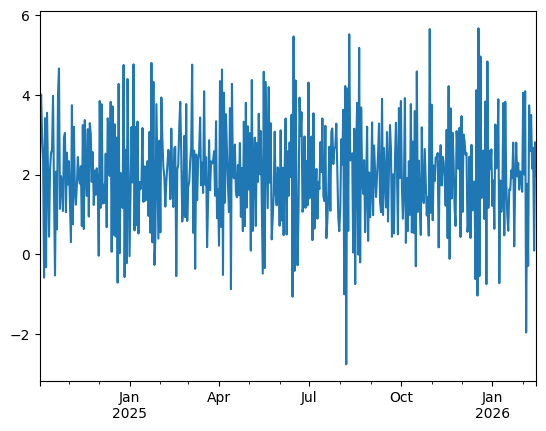

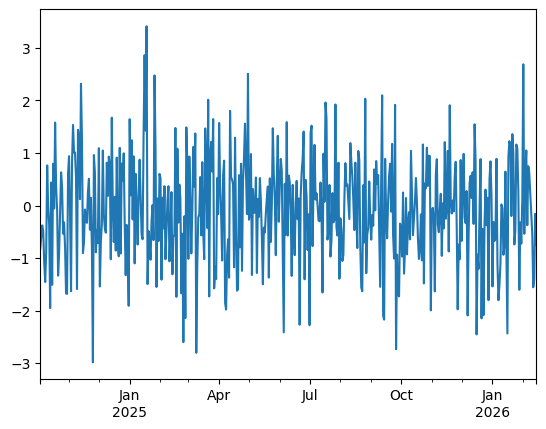

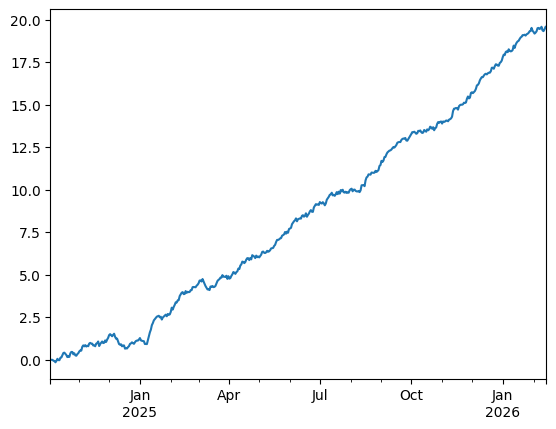

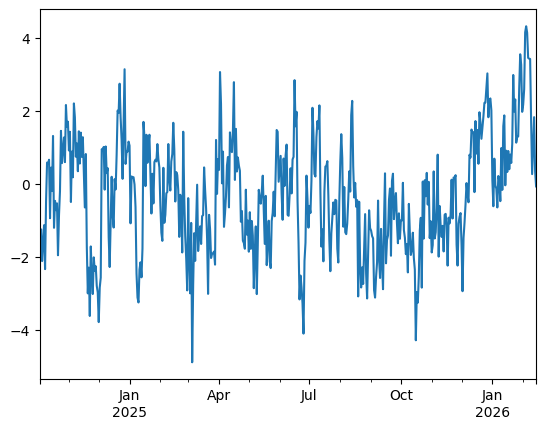

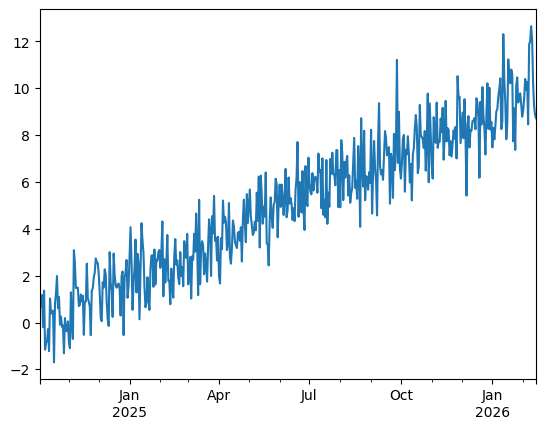

In [38]:
#===========================================================================
# load data 
#===========================================================================
    
data = sio.loadmat(path + 'session2data.mat')
T=500
    
ts1 = pd.Series(np.ravel(data['process1']), index=pd.date_range(starting_date, periods=T))
ts2 = pd.Series(np.ravel(data['process2']), index=pd.date_range(starting_date, periods=T))
ts3 = pd.Series(np.ravel(data['process3']), index=pd.date_range(starting_date, periods=T))
ts4 = pd.Series(np.ravel(data['process4']), index=pd.date_range(starting_date, periods=T))
ts5 = pd.Series(np.ravel(data['process5']), index=pd.date_range(starting_date, periods=T))
    
plt.figure(); ts1.plot()
plt.figure(); ts2.plot()
plt.figure(); ts3.plot()
plt.figure(); ts4.plot()
plt.figure(); ts5.plot() 

## Exercice 4: Information criteria in specification <a id='section_4'></a>
*[Back to toc](#section_0)*

> - Open the dataset of US monthly industrial production *indpro.csv* in Python and discuss the series. **You can also download this time series with DBnomics.**
> - Plot the series in levels from the 500th observation (roughly 1963) until the end. Deal with obvious non-stationarity by log-differencing, which produces log-growth rates. Does the plot look stationary?
> - Run ACF and PACF plots. Is it possible to infer a specification from these plots?
> - Generate a procedure to estimate all ARIMA models with lags $0-5$ for AR and $0-5$ for MA (skip the ARMA(0,0) case). While doing a for loop, collect the number of parameters and the estimated Log-likelihood of each estimation into two vectors of size (8,1).
> - Run an AIC-BIC analysis on these vectors. Which model is preferable using AIC, using BIC?
> - Re-estimate the chosen model and save the residuals vector.
> - Do the residuals look like a white noise (plot, acf, pacf,...)? Conclude.

## Exercice 5: Evaluate prediction quality <a id='section_5'></a>
*[Back to toc](#section_0)*

> - Use the industrial production dataset. Focus on monthly log-variations starting with the 1980m1 observation (i.e. the first log-difference is between 1980m1 and 1979m12).
> - Use the first 300 monthly log-diffs starting from 1980m1. Choose the best ARMA model (choose among ARMA(0,0) to ARMA(3,3)) based on the BIC criterion. 
> - Estimate the chosen model on the sample of 300 observations. Forecast 10 observations out-of-sample.
> - Now forecast one observation at a time using a recursive window: observation 301 using (1 to 300), observation 302 using (1 to 301), ...
> - Now forecast one observation at a time using a moving window of 200 observations: predict observation 301 using (101 to 300), observation 302 using (102 to 301), ...
> - Plot the three predicted series.
> - Evaluate their MSE and MAE. Which one performs the best using these criteria?
